In [ ]:
import pandas as pd
import numpy as np

# Path ke file
file_path_company = '/content/drive/My Drive/Data Set Paper ID/dim__paper__company.csv'
file_path_promotion = '/content/drive/My Drive/Data Set Paper ID/dim__paper__promotion.csv'
file_path_payment_request = '/content/drive/My Drive/Data Set Paper ID/fact__paper__digital_payment_request.csv'
file_path_payment_transaction = '/content/drive/My Drive/Data Set Paper ID/fact__paper__digital_payment_transaction.csv'

# Membaca dataset
dt_company = pd.read_csv(file_path_company)
dt_promotion = pd.read_csv(file_path_promotion)
dt_digital_payment_request = pd.read_csv(file_path_payment_request)
dt_digital_payment_transaction = pd.read_csv(file_path_payment_transaction)

In [ ]:
# Menampilkan informasi masing-masing dataset
print("=== dt_company.info() ===")
dt_company.info()

print("\n=== dt_promotion.info() ===")
dt_promotion.info()

print("\n=== dt_digital_payment_request.info() ===")
dt_digital_payment_request.info()

print("\n=== dt_digital_payment_transaction.info() ===")
dt_digital_payment_transaction.info()

=== dt_company.info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   company_id                   50000 non-null  object 
 1   company_kyc_status_name      50000 non-null  object 
 2   company_kyb_status_name      50000 non-null  object 
 3   company_type_group           49999 non-null  object 
 4   company_phone_verified_flag  50000 non-null  float64
 5   company_email_verified_flag  50000 non-null  float64
 6   user_fraud_flag              50000 non-null  float64
 7   testing_account_flag         50000 non-null  float64
 8   blacklist_account_flag       50000 non-null  float64
 9   package_active_name          50000 non-null  object 
 10  company_registered_datetime  50000 non-null  object 
dtypes: float64(5), object(6)
memory usage: 4.2+ MB

=== dt_promotion.info() ===
<class 'pandas.core.frame.Data

# **Task 2: Data Cleaning and Feature Engineering**



# **1. Data Cleaning:**



# ●	Handle missing values

In [ ]:
# Mengecek nilai null di dataset dt_company
nulls_dt_company = dt_company.isnull().sum()

# Mengecek nilai null di dataset dt_promotion
nulls_dt_promotion = dt_promotion.isnull().sum()

# Mengecek nilai null di dataset dt_digital_payment_request
nulls_dt_payment_request = dt_digital_payment_request.isnull().sum()

# Mengecek nilai null di dataset dt_digital_payment_transaction
nulls_dt_payment_transaction = dt_digital_payment_transaction.isnull().sum()

# Menampilkan jumlah nilai null di setiap kolom untuk setiap dataset
print("Nilai null di dt_company:\n", nulls_dt_company)
print("\nNilai null di dt_promotion:\n", nulls_dt_promotion)
print("\nNilai null di dt_digital_payment_request:\n", nulls_dt_payment_request)
print("\nNilai null di dt_digital_payment_transaction:\n", nulls_dt_payment_transaction)


Nilai null di dt_company:
 company_id                     0
company_kyc_status_name        0
company_kyb_status_name        0
company_type_group             1
company_phone_verified_flag    0
company_email_verified_flag    0
user_fraud_flag                0
testing_account_flag           0
blacklist_account_flag         0
package_active_name            0
company_registered_datetime    0
dtype: int64

Nilai null di dt_promotion:
 dpt_promotion_id                     49063
promotion_code                       49355
promotion_name                       49355
transaction_promo_cashback_amount        0
dtype: int64

Nilai null di dt_digital_payment_request:
 dpt_id                0
total_fee_amount      0
document_type_name    0
dtype: int64

Nilai null di dt_digital_payment_transaction:
 dpt_id                              0
dpt_promotion_id                49063
buyer_id                            0
seller_id                           0
transaction_amount                  0
payment_method_

In [ ]:
dt_promotion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   dpt_promotion_id                   937 non-null    object 
 1   promotion_code                     645 non-null    object 
 2   promotion_name                     645 non-null    object 
 3   transaction_promo_cashback_amount  50000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [ ]:
dt_promotion = dt_promotion.dropna(subset=['dpt_promotion_id'])

In [ ]:
dt_promotion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 937 entries, 78 to 49970
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   dpt_promotion_id                   937 non-null    object 
 1   promotion_code                     645 non-null    object 
 2   promotion_name                     645 non-null    object 
 3   transaction_promo_cashback_amount  937 non-null    float64
dtypes: float64(1), object(3)
memory usage: 36.6+ KB


Menghapus baris baris pada dataset promotion, karena banyak yang hanya terisi di kolom transaction_promo_cashback_amount saja, yang lainnya null



# ● Outliers





## Cek outliers **transaction_amount** dari **Digital Payment Transaction Data**

In [ ]:
# Five-number summary
Q1 = dt_digital_payment_transaction['transaction_amount'].quantile(0.25)
Q3 = dt_digital_payment_transaction['transaction_amount'].quantile(0.75)
IQR = Q3 - Q1

# Definisi batas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Data outliers
outliers = dt_digital_payment_transaction[(dt_digital_payment_transaction['transaction_amount'] < lower_bound) |
                (dt_digital_payment_transaction['transaction_amount'] > upper_bound)]

print(f"Jumlah outliers: {len(outliers)}")
print(outliers.head())

Jumlah outliers: 6777
                                               dpt_id dpt_promotion_id  \
12  3994ae53eabf3ffe2d20340a45f3c75b99c8458815bc1c...              NaN   
14  a6dcc743fe284523416b67914fe1c5b11bb26e70999b92...              NaN   
17  2d2378e0f0a8786dccf6fc23e1ec68a68b5d2d818dc2cc...              NaN   
22  890aa93fbe0e0edce8ab0bbe3d9fe06d684336991b2652...              NaN   
31  8f110fe98176434656c2867d9249317973607c14fc9157...              NaN   

                                             buyer_id  \
12  4e748c692460aa2d2f08354ea0ef0b2146addf170d4c6a...   
14  ffcb909cf0b66998e1f034d00ed93b65350b1defddd6e2...   
17  ecad68c6f8f865f785578f9be9fde7916f2f598858c28d...   
22  b958f0abcc3036f39ef281236179d70aa1f6e44c9775cf...   
31  19fb72a33fb7d746ea5049eb55a7399479614bd8eb4eaf...   

                                            seller_id  transaction_amount  \
12  5d2233f5a1a6435891142442fac09a77809d0c16496f07...        9.999939e+07   
14  5d2233f5a1a6435891142442fac09a77

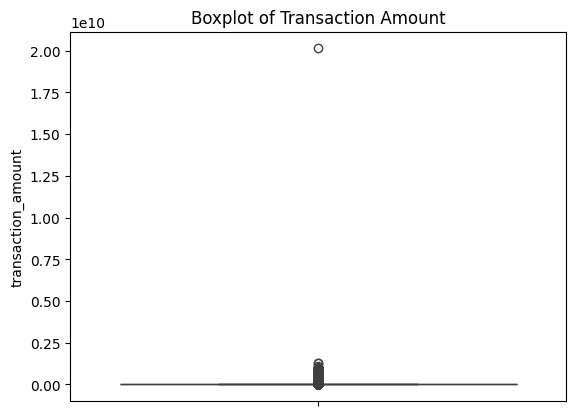

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(dt_digital_payment_transaction['transaction_amount'])
plt.title('Boxplot of Transaction Amount')
plt.show()

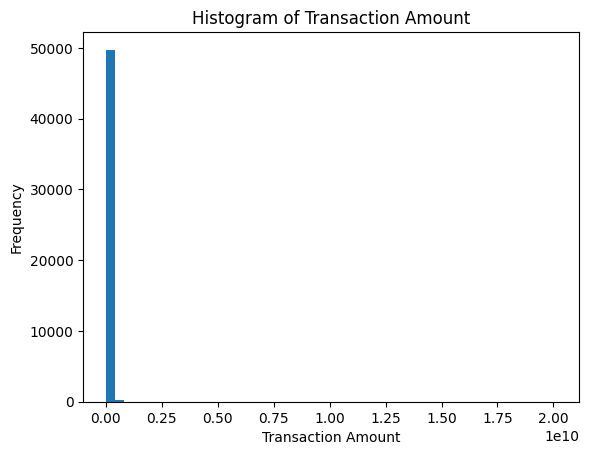

In [ ]:
plt.hist(dt_digital_payment_transaction['transaction_amount'], bins=50)
plt.title('Histogram of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


Kesimpulannya untuk kolom ini, masih terbilang aman dan bukan outliers yang perlu di hapus karena masih wajar ada transaksi antar bisnis yang nilainya sampai puluhan miliyar (masih mungkin untuk dilakukan)



## Cek outliers **total_fee_amount** dari **Digital Payment Request Data**

In [ ]:
# Five-number summary
Q1 = dt_digital_payment_request['total_fee_amount'].quantile(0.25)
Q3 = dt_digital_payment_request['total_fee_amount'].quantile(0.75)
IQR = Q3 - Q1

# Definisi batas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Data outliers
outliers = dt_digital_payment_request[(dt_digital_payment_request['total_fee_amount'] < lower_bound) |
                (dt_digital_payment_request['total_fee_amount'] > upper_bound)]

print(f"Jumlah outliers: {len(outliers)}")
print(outliers.head())

Jumlah outliers: 6884
                                               dpt_id  total_fee_amount  \
12  3994ae53eabf3ffe2d20340a45f3c75b99c8458815bc1c...      1.429267e+06   
14  a6dcc743fe284523416b67914fe1c5b11bb26e70999b92...      1.251868e+07   
17  2d2378e0f0a8786dccf6fc23e1ec68a68b5d2d818dc2cc...      1.550000e+06   
31  8f110fe98176434656c2867d9249317973607c14fc9157...      7.824600e+05   
34  63013866b06a6bfdb1e3e046d42eaedd7fbf545c21d45a...      1.392000e+06   

   document_type_name  
12            PAY-OUT  
14            PAY-OUT  
17            PAY-OUT  
31             PAY-IN  
34            PAY-OUT  


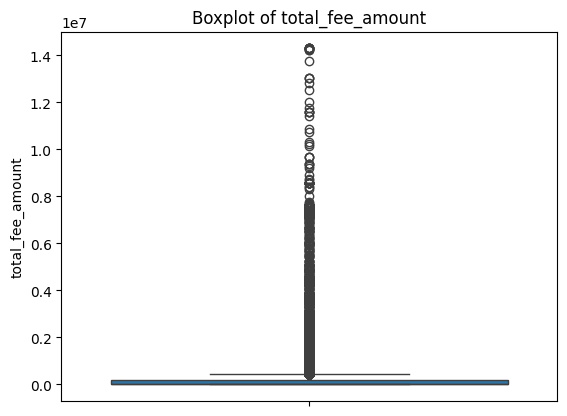

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(dt_digital_payment_request['total_fee_amount'])
plt.title('Boxplot of total_fee_amount')
plt.show()

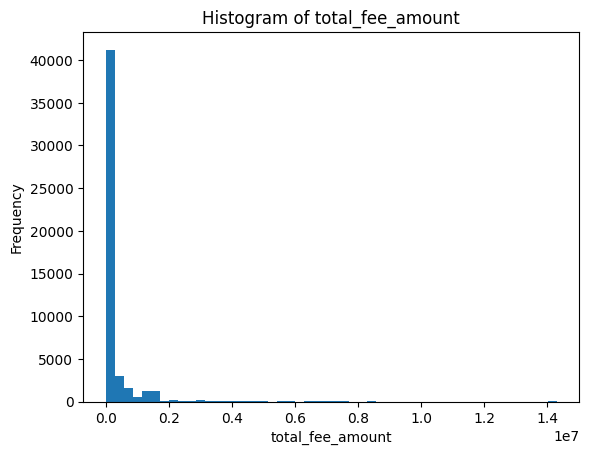

In [ ]:
plt.hist(dt_digital_payment_request['total_fee_amount'], bins=50)
plt.title('Histogram of total_fee_amount')
plt.xlabel('total_fee_amount')
plt.ylabel('Frequency')
plt.show()

**Kesimpulannya pada kolom ini nilai outliers masih wajar, dan berasal dari transaksi nyata bukan dari kesalahan input/sistem, jadi baris baris tersebut tetap di pertahankan segbagai mana aslinya**

## Cek outliers **transaction_promo_cashback_amount** dari **Promotion Data**

In [ ]:
# Five-number summary
Q1 = dt_promotion['transaction_promo_cashback_amount'].quantile(0.25)
Q3 = dt_promotion['transaction_promo_cashback_amount'].quantile(0.75)
IQR = Q3 - Q1

# Definisi batas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Data outliers
outliers = dt_promotion[(dt_promotion['transaction_promo_cashback_amount'] < lower_bound) |
                (dt_promotion['transaction_promo_cashback_amount'] > upper_bound)]

print(f"Jumlah outliers: {len(outliers)}")
print(outliers.head())

Jumlah outliers: 67
                                       dpt_promotion_id promotion_code  \
202   877cbc48ac832c9f872a12d06d949376f0d918ad48868d...       PPRMAYN2   
266   0a77054fc75a9d6dbb33ae4be6e3420e557715ef8c3a2a...       PPRMARF1   
947   6f4716fd7e3cbd6db611be014c647f08203b97c53c6a41...            NaN   
2079  48dc720266358e4ef9aa83a8bd747bc6119b18a7f87141...            NaN   
2228  92eb0e2ec24e64a91e40062bfdc2636e3452641f577c93...       PPRFEBC2   

           promotion_name  transaction_promo_cashback_amount  
202   Promo Loyalty Mei 2                           450000.0  
266              MERIAH-1                           499800.0  
947                   NaN                          1000000.0  
2079                  NaN                           750000.0  
2228         Feb-bastic 2                          1000000.0  


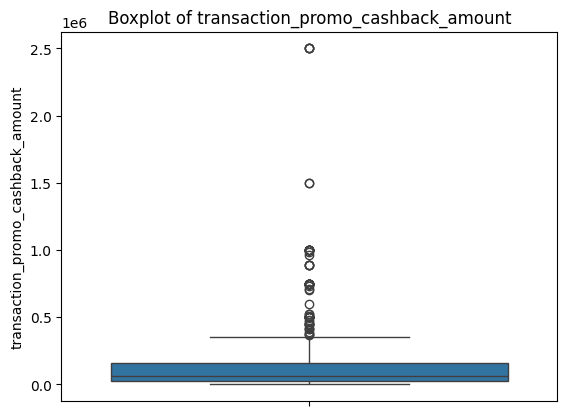

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(dt_promotion['transaction_promo_cashback_amount'])
plt.title('Boxplot of transaction_promo_cashback_amount')
plt.show()

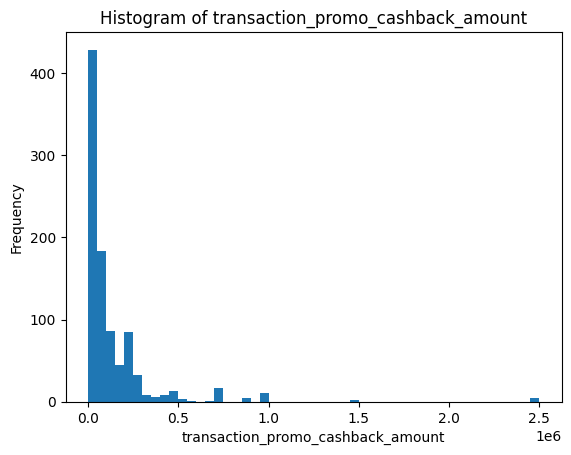

In [ ]:
plt.hist(dt_promotion['transaction_promo_cashback_amount'], bins=50)
plt.title('Histogram of transaction_promo_cashback_amount')
plt.xlabel('transaction_promo_cashback_amount')
plt.ylabel('Frequency')
plt.show()

**Kesimpulan untuk outliers kolom ini adalah nilai outliersnya masih wajar dan tidak perlu di hilangkan dari dataset karena nilai besar bisa di simpulkan memang berasal dari transaksi asli dan bukan kesalahan iput atau sistem**

# ● Anomali

Anomali pada Digital Payment Transaction Data

In [ ]:
# Anomali 1: Buyer dan seller adalah akun yang sama
buyer_seller_anomalies = dt_digital_payment_transaction[dt_digital_payment_transaction['buyer_id'] == dt_digital_payment_transaction['seller_id']]

# Anomali 2: Tanggal transaksi tidak valid
datetime_anomalies = dt_digital_payment_transaction[
    pd.to_datetime(dt_digital_payment_transaction['transaction_created_datetime']) >
    pd.to_datetime(dt_digital_payment_transaction['transaction_updated_datetime'])
]

print("Anomali Transaction Amount:\n", amount_anomalies.head())
print("Anomali Buyer-Seller:\n", buyer_seller_anomalies.head())
print("Anomali Tanggal Transaksi:\n", datetime_anomalies.head())

Anomali Transaction Amount:
                                                 dpt_id     dpt_promotion_id  \
14   a6dcc743fe284523416b67914fe1c5b11bb26e70999b92...                  NaN   
60   117647c0f6a590e1d4ae86d4070db184b4abf70616e582...                  NaN   
66   99adbea1d10cc1cd7e1a7889e96d071be7ebc81bc640c2...                  NaN   
94   987c479ab27d2f82d6f12a335c14a9e3612373a4708ffb...                  NaN   
202  d5715ca283e6e33071251e4d1bb627528662d0f25020e4...  promotion-251182596   

                                              buyer_id  \
14   ffcb909cf0b66998e1f034d00ed93b65350b1defddd6e2...   
60   adf024dab63cd741acb845cf75ac28a836cfba564df266...   
66   adf024dab63cd741acb845cf75ac28a836cfba564df266...   
94   053819be0c911b698bbd253728ba9b9a85779f2d9a5a39...   
202  ef958867c89944a43d26df0ada8ff693ff1b7142cbafe0...   

                                             seller_id  transaction_amount  \
14   5d2233f5a1a6435891142442fac09a77809d0c16496f07...        8.47097

**Kesimpulannya pada dataset ini ada anomali, dimana perusaaah buyer dan seler memliki id yang sama**

Anomali pada Digital Payment Request Data


In [ ]:
# Anomali 1: Document type yang tidak valid dengan fee tertentu (contoh aturan logis)
invalid_document_fee = dt_digital_payment_request[
    (dt_digital_payment_request['document_type_name'] == 'Standard') &
    (dt_digital_payment_request['total_fee_amount'] > 1000)
]

print("Anomali Document Type:\n", invalid_document_fee.head())

Anomali Document Type:
 Empty DataFrame
Columns: [dpt_id, total_fee_amount, document_type_name]
Index: []


**Kesimpulannya tidak ada keanehan padad dataset ini**

Anomali pada Promotion Data

In [ ]:
# Gabungkan data untuk mendapatkan informasi yang dibutuhkan
merged_data = pd.merge(dt_digital_payment_transaction, dt_promotion, on='dpt_promotion_id', how='left')

# Anomali 1: Cashback lebih besar dari jumlah transaksi
cashback_anomalies = merged_data[merged_data['transaction_promo_cashback_amount'] > merged_data['transaction_amount']]

# Anomali 2: Promotion code digunakan berulang oleh akun
promo_usage = merged_data.groupby(['promotion_code', 'buyer_id']).size().reset_index(name='usage_count')
frequent_promo_users = promo_usage[promo_usage['usage_count'] > 10]

# Output hasil
print("Anomali Cashback (Cashback lebih besar dari transaksi):\n", cashback_anomalies.head())
print("Penggunaan Promo Berulang (Lebih dari 10 kali):\n", frequent_promo_users.head())

Anomali Cashback (Cashback lebih besar dari transaksi):
 Empty DataFrame
Columns: [dpt_id, dpt_promotion_id, buyer_id, seller_id, transaction_amount, payment_method_name, payment_provider_name, transaction_created_datetime, transaction_updated_datetime, zscore, anomaly, amount_zscore, promotion_code, promotion_name, transaction_promo_cashback_amount]
Index: []
Penggunaan Promo Berulang (Lebih dari 10 kali):
 Empty DataFrame
Columns: [promotion_code, buyer_id, usage_count]
Index: []


**Kesimpulannya tidak ada data yang aneh, semua cashback pasti lebih rendah nilainya dari total transcaction amount**

Anomali pada data Perusahaan

In [ ]:
# Konversi kolom datetime menjadi format datetime
dt_company['registered_date'] = pd.to_datetime(dt_company['company_registered_datetime'])
dt_company['date_only'] = dt_company['registered_date'].dt.date  # Ambil hanya tanggal

# Menghitung jumlah pendaftaran per hari
batch_registration = dt_company.groupby('date_only').size().reset_index(name='registration_count')

# Menghitung statistik deskriptif: Q1, Q3, IQR
Q1 = batch_registration['registration_count'].quantile(0.25)
Q3 = batch_registration['registration_count'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas normal menggunakan IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mendeteksi batch registrasi yang mencurigakan (di luar batas normal)
suspicious_batches = batch_registration[
    (batch_registration['registration_count'] < lower_bound) |
    (batch_registration['registration_count'] > upper_bound)
]

# Output hasil
print(f"Batas Normal: {lower_bound:.2f} hingga {upper_bound:.2f}")
print("Batch Registrasi Mencurigakan:\n", suspicious_batches.head())

Batas Normal: -75.00 hingga 133.00
Batch Registrasi Mencurigakan:
       date_only  registration_count
117  2020-01-07                 157
369  2021-09-29                 218
393  2021-10-30                 712
394  2021-10-31                 146
414  2021-11-20                 149


Kesimpulan anomali pada dataset ini, pendaftaran pada hari hari tertentu sangat banyak, bisa mengindikasikan bahwa terjadi pendaftaran masal untuk tujuan fraud, namun perlu di teliti lebih lanjut, karena bisa jadi hal ini efek dari promosi dari PaperId sendiri, jadinya banyak pepndaftar yang  masal pada hari hari tertentu

# ● Suspicious missing data or inconsistencies in key fraud-related

In [ ]:
# Memeriksa missing values pada kolom yang relevan
missing_data = dt_company[['user_fraud_flag', 'blacklist_account_flag']].isnull().sum()
print(f"Missing data pada 'user_fraud_flag' dan 'blacklist_account_flag':\n{missing_data}")

Missing data pada 'user_fraud_flag' dan 'blacklist_account_flag':
user_fraud_flag           0
blacklist_account_flag    0
dtype: int64


In [ ]:
# Memeriksa inkonsistensi antara 'user_fraud_flag' dan 'blacklist_account_flag'
inconsistent_data = dt_company[(dt_company['user_fraud_flag'] == 'true') &
                                 (dt_company['blacklist_account_flag'] != 'true')]

print(f"Inkonsistensi data:\n{inconsistent_data}")


Inkonsistensi data:
Empty DataFrame
Columns: [company_id, company_kyc_status_name, company_kyb_status_name, company_type_group, company_phone_verified_flag, company_email_verified_flag, user_fraud_flag, testing_account_flag, blacklist_account_flag, package_active_name, company_registered_datetime, registered_date, date_only]
Index: []


In [ ]:
# Memeriksa apakah terdapat nilai yang tidak konsisten pada kolom flag
invalid_flags = dt_company[dt_company['user_fraud_flag'].isin(['true', 'false'])]
print(f"Data tidak konsisten di 'user_fraud_flag':\n{invalid_flags}")

Data tidak konsisten di 'user_fraud_flag':
Empty DataFrame
Columns: [company_id, company_kyc_status_name, company_kyb_status_name, company_type_group, company_phone_verified_flag, company_email_verified_flag, user_fraud_flag, testing_account_flag, blacklist_account_flag, package_active_name, company_registered_datetime, registered_date, date_only]
Index: []


In [ ]:
# Pastikan kolom waktu transaksi dalam format datetime
dt_digital_payment_transaction['transaction_created_datetime'] = pd.to_datetime(dt_digital_payment_transaction['transaction_created_datetime'])
dt_digital_payment_transaction['transaction_updated_datetime'] = pd.to_datetime(dt_digital_payment_transaction['transaction_updated_datetime'])

# Memeriksa jika ada transaksi dengan waktu pembaruan lebih awal dari waktu pembuatan
invalid_time_data = dt_digital_payment_transaction[dt_digital_payment_transaction['transaction_updated_datetime'] < dt_digital_payment_transaction['transaction_created_datetime']]
print(f"Transaksi dengan waktu pembaruan lebih awal dari waktu pembuatan:\n{invalid_time_data}")


Transaksi dengan waktu pembaruan lebih awal dari waktu pembuatan:
Empty DataFrame
Columns: [dpt_id, dpt_promotion_id, buyer_id, seller_id, transaction_amount, payment_method_name, payment_provider_name, transaction_created_datetime, transaction_updated_datetime, zscore, anomaly, amount_zscore]
Index: []


In [ ]:
# Memeriksa apakah setiap 'dpt_promotion_id' di transaction_data memiliki data terkait di promotion_data
missing_promotions = dt_digital_payment_transaction[dt_digital_payment_transaction['dpt_promotion_id'].isin(dt_promotion['dpt_promotion_id'])]
print(f"Transaksi yang tidak memiliki promosi terkait:\n{missing_promotions}")

Transaksi yang tidak memiliki promosi terkait:
Empty DataFrame
Columns: [dpt_id, dpt_promotion_id, buyer_id, seller_id, transaction_amount, payment_method_name, payment_provider_name, transaction_created_datetime, transaction_updated_datetime, zscore, anomaly, amount_zscore]
Index: []


In [ ]:
# Memeriksa perusahaan dengan status KYC/KBV yang tidak valid tapi terlibat dalam transaksi
invalid_kyc_companies = dt_company[(dt_company['company_kyc_status_name'] == 'AKUN_DIBEKUKAN') |
                                     (dt_company['company_kyb_status_name'] == 'AKUN_DIBEKUKAN')]

# Memastikan perusahaan ini tidak terlibat dalam transaksi
companies_with_transactions = dt_digital_payment_transaction[dt_digital_payment_transaction['seller_id'].isin(invalid_kyc_companies['company_id'])]

print(f"Perusahaan dengan status KYC/KBV tidak valid yang terlibat dalam transaksi:\n{companies_with_transactions}")


Perusahaan dengan status KYC/KBV tidak valid yang terlibat dalam transaksi:
                                                  dpt_id dpt_promotion_id  \
55     b6b7962cdedcff94252b665ede6ba547dd7ec2c748104f...              NaN   
57     dd4bd7d7dd2bf1ec0d65e463331c504964b41ff603fcdf...              NaN   
71     06f4d1567d2ac261aa6af2467406e41704924c709348fe...              NaN   
72     8e977c69c62f0449f4e0a05a2fcb6501c04c706fa29d5a...              NaN   
139    4e3039b0d73bf33566d21fb3cb357a2d191b919755f518...              NaN   
...                                                  ...              ...   
49848  74140921ac0ea87512a8982d22722a47f73d6053def4ac...              NaN   
49902  44b2f6125252eff4ebde3a7c43276943dad3acadb79849...              NaN   
49904  e7171f40afc9ed490be88c2078f6245c9e51d0206ff317...              NaN   
49935  dd83a26618c201c4dfe13b363f6b20cd2aed2802ffd92b...              NaN   
49954  a9c10f47c20715de54c22295a8b0e30f45977d76861c14...              NaN   


# **2. Feature Engginering**

# ●	Buyer-Seller Relationship Score

In [ ]:
# Hitung jumlah transaksi antara setiap pasangan buyer-seller
buyer_seller_interaction = dt_digital_payment_transaction.groupby(["buyer_id", "seller_id"]).size().reset_index(name="transaction_count")

# Tampilkan hasil
print(buyer_seller_interaction.head())

                                            buyer_id  \
0  00048ebf5503ef1dfb03eec05312583eeb2b57320ac682...   
1  001046b5061e28476b83fe2335b04d3210bed72a2fee17...   
2  00119737eef11ff1d30c2061dd1e19c06d963d5a125c92...   
3  0012614e5a1366f102a3497b67f8ec9a8009c802aa6959...   
4  0013cdaff46e67574660e0ddd214e5032e3ff5d94744e1...   

                                           seller_id  transaction_count  
0  00048ebf5503ef1dfb03eec05312583eeb2b57320ac682...                  2  
1  5d2233f5a1a6435891142442fac09a77809d0c16496f07...                  2  
2  5d2233f5a1a6435891142442fac09a77809d0c16496f07...                  1  
3  5d2233f5a1a6435891142442fac09a77809d0c16496f07...                  1  
4  5d2233f5a1a6435891142442fac09a77809d0c16496f07...                 13  


In [ ]:
# Normalisasi transaction_count agar berada di rentang [0, 1]
max_transaction = buyer_seller_interaction["transaction_count"].max()
buyer_seller_interaction["relationship_score"] = buyer_seller_interaction["transaction_count"] / max_transaction

# Tampilkan hasil
print(buyer_seller_interaction.head())

                                            buyer_id  \
0  00048ebf5503ef1dfb03eec05312583eeb2b57320ac682...   
1  001046b5061e28476b83fe2335b04d3210bed72a2fee17...   
2  00119737eef11ff1d30c2061dd1e19c06d963d5a125c92...   
3  0012614e5a1366f102a3497b67f8ec9a8009c802aa6959...   
4  0013cdaff46e67574660e0ddd214e5032e3ff5d94744e1...   

                                           seller_id  transaction_count  \
0  00048ebf5503ef1dfb03eec05312583eeb2b57320ac682...                  2   
1  5d2233f5a1a6435891142442fac09a77809d0c16496f07...                  2   
2  5d2233f5a1a6435891142442fac09a77809d0c16496f07...                  1   
3  5d2233f5a1a6435891142442fac09a77809d0c16496f07...                  1   
4  5d2233f5a1a6435891142442fac09a77809d0c16496f07...                 13   

   relationship_score  
0            0.001580  
1            0.001580  
2            0.000790  
3            0.000790  
4            0.010269  


In [ ]:
# Tandai pasangan buyer-seller mencurigakan
threshold = 0.8
buyer_seller_interaction["suspicious"] = buyer_seller_interaction["relationship_score"] > threshold

# Tampilkan pasangan mencurigakan
buyer_seller_interaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10354 entries, 0 to 10353
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   buyer_id            10354 non-null  object 
 1   seller_id           10354 non-null  object 
 2   transaction_count   10354 non-null  int64  
 3   relationship_score  10354 non-null  float64
 4   suspicious          10354 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 333.8+ KB


In [ ]:
# Gabungkan relationship_score dengan dataset DPTD
dt_digital_payment_transaction = dt_digital_payment_transaction.merge(buyer_seller_interaction, on=["buyer_id", "seller_id"], how="left")

# Tampilkan dataset yang sudah ditambahkan relationship_score
print(dt_digital_payment_transaction.head())

                                              dpt_id dpt_promotion_id  \
0  69e9566b3f4d6cb7db2216121b0cd0308c516e680e9c78...              NaN   
1  961d6f7efde3622da8f35e76e2b53acd84c647a661de86...              NaN   
2  6441defc089b4ae947cce529904a5c7db2326ede52bdaa...              NaN   
3  64152dd86b2c5d1af6aaa911e7a229dc539273e0a7b8be...              NaN   
4  ae4ddde99c8fe7f73fb3c2ee0e157e886b52417ece17bd...              NaN   

                                            buyer_id  \
0  bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...   
1  09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...   
2  25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...   
3  5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...   
4  5c19a13a9b229340b584f621b648f4dec7491e12368392...   

                                           seller_id  transaction_amount  \
0  5d2233f5a1a6435891142442fac09a77809d0c16496f07...             20380.0   
1  5d2233f5a1a6435891142442fac09a77809d0c16496f07...             14673.6

# ●	Transaction Frequency Metrics

In [ ]:
dt_digital_payment_transaction['transaction_created_datetime'] = pd.to_datetime(dt_digital_payment_transaction['transaction_created_datetime'])

In [ ]:
dt_digital_payment_transaction = dt_digital_payment_transaction.sort_values(by=['buyer_id', 'seller_id', 'transaction_created_datetime'])

In [ ]:
# Buyer
dt_digital_payment_transaction['time_diff_buyer'] = dt_digital_payment_transaction.groupby('buyer_id')['transaction_created_datetime'].diff().dt.total_seconds()

# Seller
dt_digital_payment_transaction['time_diff_seller'] = dt_digital_payment_transaction.groupby('seller_id')['transaction_created_datetime'].diff().dt.total_seconds()


In [ ]:
burst_threshold = 10  # dalam detik

# Flag untuk buyer
dt_digital_payment_transaction['buyer_burst_flag'] = dt_digital_payment_transaction['time_diff_buyer'] < burst_threshold

# Flag untuk seller
dt_digital_payment_transaction['seller_burst_flag'] = dt_digital_payment_transaction['time_diff_seller'] < burst_threshold

In [ ]:
dt_digital_payment_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 22038 to 38829
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   dpt_id                        50000 non-null  object        
 1   dpt_promotion_id              937 non-null    object        
 2   buyer_id                      50000 non-null  object        
 3   seller_id                     50000 non-null  object        
 4   transaction_amount            50000 non-null  float64       
 5   payment_method_name           50000 non-null  object        
 6   payment_provider_name         50000 non-null  object        
 7   transaction_created_datetime  50000 non-null  datetime64[ns]
 8   transaction_updated_datetime  50000 non-null  object        
 9   transaction_count             50000 non-null  int64         
 10  relationship_score            50000 non-null  float64       
 11  suspicious                   

# ●	(ERROR) Promotion Exploitation Indicator

In [ ]:
# 1. Gabungkan data transaksi dan promosi
merged_data = pd.merge(dt_digital_payment_transaction, dt_promotion, on='dpt_promotion_id', how='inner')

# 2. Hitung frekuensi penggunaan promo oleh setiap buyer
promo_usage = merged_data.groupby(['buyer_id', 'promotion_code']).size().reset_index(name='promo_usage_count')

# 3. Identifikasi eksploitasi berdasarkan ambang batas
# Misalkan, penggunaan promo lebih dari 2 kali dianggap eksploitasi
threshold = 2
promo_usage['is_exploitation'] = promo_usage['promo_usage_count'] > threshold

# 4. Tampilkan hasil
print(promo_usage)

merged_data.info()

dt_promotion.info()
dt_digital_payment_transaction.info()

Empty DataFrame
Columns: [buyer_id, promotion_code, promo_usage_count, is_exploitation]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   dpt_id                             0 non-null      object        
 1   dpt_promotion_id                   0 non-null      object        
 2   buyer_id                           0 non-null      object        
 3   seller_id                          0 non-null      object        
 4   transaction_amount                 0 non-null      float64       
 5   payment_method_name                0 non-null      object        
 6   payment_provider_name              0 non-null      object        
 7   transaction_created_datetime       0 non-null      datetime64[ns]
 8   transaction_updated_datetime       0 non-null      object        
 9   transaction_count      

# **3.	Scaling and Normalization:**

# ●	Normalize transaction amounts and time-based data for further analysis.

In [ ]:
# Menampilkan hanya kolom Primary Key dan kolom normalisasi
def tampilkan_kolom_tertentu(df, primary_key, normalized_columns):
    selected_columns = [primary_key] + normalized_columns
    return df[selected_columns]

# Dataset Digital Payment Transaction
primary_key_transaction = 'dpt_id'  # Ganti dengan nama Primary Key sebenarnya
columns_normalized_transaction = ['transaction_amount', 'transaction_created_datetime']
print("Digital Payment Transaction:")
print(tampilkan_kolom_tertentu(dt_digital_payment_transaction, primary_key_transaction, columns_normalized_transaction))

# Dataset Digital Payment Request
primary_key_request = 'dpt_id'  # Ganti dengan nama Primary Key sebenarnya
columns_normalized_request = ['total_fee_amount']
print("\nDigital Payment Request:")
print(tampilkan_kolom_tertentu(dt_digital_payment_request, primary_key_request, columns_normalized_request))

# Dataset Promotion
primary_key_promotion = 'dpt_promotion_id'  # Ganti dengan nama Primary Key sebenarnya
columns_normalized_promotion = ['transaction_promo_cashback_amount']
print("\nPromotion Data:")
print(tampilkan_kolom_tertentu(dt_promotion, primary_key_promotion, columns_normalized_promotion))

# Dataset Company
primary_key_company = 'company_id'  # Ganti dengan nama Primary Key sebenarnya
columns_normalized_company = ['company_registered_datetime']
print("\nCompany Data:")
print(tampilkan_kolom_tertentu(dt_company, primary_key_company, columns_normalized_company))


Digital Payment Transaction:
                                                  dpt_id  transaction_amount  \
0      69e9566b3f4d6cb7db2216121b0cd0308c516e680e9c78...             20380.0   
1      961d6f7efde3622da8f35e76e2b53acd84c647a661de86...             14673.6   
2      6441defc089b4ae947cce529904a5c7db2326ede52bdaa...           1012500.0   
3      64152dd86b2c5d1af6aaa911e7a229dc539273e0a7b8be...             30000.0   
4      ae4ddde99c8fe7f73fb3c2ee0e157e886b52417ece17bd...           1000008.0   
...                                                  ...                 ...   
49995  4da123d84a819edf166f67a9cc0c197f81967aa9717ed5...           1000000.0   
49996  0b358a09e15d062e1d9e0fafb8a986d802c2044b150a6e...          50039500.0   
49997  ba67db08614a504cc5c9042cc61c914fa82748d526f0f3...           4531500.0   
49998  351da251d731cba588418e4a175460cc822ecbeb751751...           8424500.0   
49999  c676fb603d97aefc62bff989158356e210f89d2cf5cb4a...          30044000.0   

      tran

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi dataset `dt_digital_payment_transaction`
def normalize_digital_payment_transaction(df):
    df['transaction_created_datetime'] = pd.to_datetime(df['transaction_created_datetime'])
    df['transaction_created_datetime'] = df['transaction_created_datetime'].astype(int) // 10**9  # Convert to timestamp

    # Kolom yang akan dinormalisasi
    columns_to_normalize = ['transaction_amount', 'transaction_created_datetime']
    scaler = MinMaxScaler()
    df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
    return df

# Normalisasi dataset `dt_digital_payment_request`
def normalize_digital_payment_request(df):
    # Kolom yang akan dinormalisasi
    columns_to_normalize = ['total_fee_amount']
    scaler = MinMaxScaler()
    df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
    return df

# Normalisasi dataset `dt_promotion`
def normalize_promotion(df):
    # Kolom yang akan dinormalisasi
    columns_to_normalize = ['transaction_promo_cashback_amount']
    scaler = MinMaxScaler()
    df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
    return df

# Normalisasi dataset `dt_company`
def normalize_company(df):
    df['company_registered_datetime'] = pd.to_datetime(df['company_registered_datetime'])
    df['company_registered_datetime'] = df['company_registered_datetime'].astype(int) // 10**9  # Convert to timestamp

    # Kolom yang akan dinormalisasi
    columns_to_normalize = ['company_registered_datetime']
    scaler = MinMaxScaler()
    df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
    return df

# Apply normalisasi ke setiap dataset
dt_digital_payment_transaction = normalize_digital_payment_transaction(dt_digital_payment_transaction)
dt_digital_payment_request = normalize_digital_payment_request(dt_digital_payment_request)
dt_promotion = normalize_promotion(dt_promotion)
dt_company = normalize_company(dt_company)

# Output hasil
# Dataset Digital Payment Transaction
primary_key_transaction = 'dpt_id'  # Ganti dengan nama Primary Key sebenarnya
columns_normalized_transaction = ['transaction_amount', 'transaction_created_datetime']
print("Digital Payment Transaction:")
print(tampilkan_kolom_tertentu(dt_digital_payment_transaction, primary_key_transaction, columns_normalized_transaction))

# Dataset Digital Payment Request
primary_key_request = 'dpt_id'  # Ganti dengan nama Primary Key sebenarnya
columns_normalized_request = ['total_fee_amount']
print("\nDigital Payment Request:")
print(tampilkan_kolom_tertentu(dt_digital_payment_request, primary_key_request, columns_normalized_request))

# Dataset Promotion
primary_key_promotion = 'dpt_promotion_id'  # Ganti dengan nama Primary Key sebenarnya
columns_normalized_promotion = ['transaction_promo_cashback_amount']
print("\nPromotion Data:")
print(tampilkan_kolom_tertentu(dt_promotion, primary_key_promotion, columns_normalized_promotion))

# Dataset Company
primary_key_company = 'company_id'  # Ganti dengan nama Primary Key sebenarnya
columns_normalized_company = ['company_registered_datetime']
print("\nCompany Data:")
print(tampilkan_kolom_tertentu(dt_company, primary_key_company, columns_normalized_company))


Digital Payment Transaction:
                                                  dpt_id  transaction_amount  \
22038  befdc59cf11ec39defab73c7baa0bd1c16ea7e003b59af...            0.000005   
20987  2bc105494f6030d5194fc6fdc50d9acede7d122dd80b3a...            0.000007   
30963  d8c359cc9de4f730939cfa6c5b50bac2215cf994a30816...            0.009930   
9971   769c7fdcc0e36175c9363c6d822ebb5b9c8748acb8c12e...            0.014896   
21264  d808c4f7daf19127c77a79dffadf947d9a5d4fa4a9ecb7...            0.001007   
...                                                  ...                 ...   
9049   3220d105503b34c8a43da87b7ac5365923742d74e699ae...            0.000504   
25856  0785c548ad9260f4c65b37836520e3781c9fd1cd441431...            0.000140   
17692  7862efbfd8e68bd315332118e2c1dfb7e825ceb06819b0...            0.001241   
24571  af0c97c859e45bcc17205bc081a7cfaa73c19a31369e22...            0.002514   
38829  f502986b22a0a1e19aace5bf687694ccc083cd18d81849...            0.000003   

       tra

In [ ]:
# Simpan file CSV langsung ke Google Drive
dt_company.to_csv('/content/drive/My Drive/ColabDatasets/comp-v2.csv', index=False)
dt_promotion.to_csv('/content/drive/My Drive/ColabDatasets/promotion-v2.csv', index=False)
dt_digital_payment_request.to_csv('/content/drive/My Drive/ColabDatasets/request-v2.csv', index=False)
dt_digital_payment_transaction.to_csv('/content/drive/My Drive/ColabDatasets/transaction-v2.csv', index=False)

# **[EXTRA] : Tarik CSV hasil modif Python**

In [ ]:
import pandas as pd

dt_company = pd.read_csv('/content/drive/MyDrive/ColabDatasets/comp-v2.csv')
dt_promotion = pd.read_csv('/content/drive/MyDrive/ColabDatasets/promotion-v2.csv')
dt_digital_payment_request = pd.read_csv('/content/drive/MyDrive/ColabDatasets/request-v2.csv')
dt_digital_payment_transaction = pd.read_csv('/content/drive/MyDrive/ColabDatasets/transaction-v2.csv')

In [ ]:
# Menampilkan informasi masing-masing dataset
print("=== dt_company.info() ===")
dt_company.info()

print("\n=== dt_promotion.info() ===")
dt_promotion.info()

print("\n=== dt_digital_payment_request.info() ===")
dt_digital_payment_request.info()

print("\n=== dt_digital_payment_transaction.info() ===")
dt_digital_payment_transaction.info()

=== dt_company.info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   company_id                   50000 non-null  object 
 1   company_kyc_status_name      50000 non-null  object 
 2   company_kyb_status_name      50000 non-null  object 
 3   company_type_group           49999 non-null  object 
 4   company_phone_verified_flag  50000 non-null  float64
 5   company_email_verified_flag  50000 non-null  float64
 6   user_fraud_flag              50000 non-null  float64
 7   testing_account_flag         50000 non-null  float64
 8   blacklist_account_flag       50000 non-null  float64
 9   package_active_name          50000 non-null  object 
 10  company_registered_datetime  50000 non-null  object 
dtypes: float64(5), object(6)
memory usage: 4.2+ MB

=== dt_promotion.info() ===
<class 'pandas.core.frame.Data

In [ ]:
dt_digital_payment_transaction.head()

,dpt_id,dpt_promotion_id,buyer_id,seller_id,transaction_amount,payment_method_name,payment_provider_name,transaction_created_datetime,transaction_updated_datetime,transaction_count,relationship_score,suspicious,time_diff_buyer,time_diff_seller,buyer_burst_flag,seller_burst_flag
0,befdc59cf11ec39defab73c7baa0bd1c16ea7e003b59af...,NaN,00048ebf5503ef1dfb03eec05312583eeb2b57320ac682...,00048ebf5503ef1dfb03eec05312583eeb2b57320ac682...,100700.0,QRIS,QRIS,2023-12-27 08:47:56.463138,2023-12-27 08:48:03.576944,2,0.00158,False,NaN,NaN,False,False
1,2bc105494f6030d5194fc6fdc50d9acede7d122dd80b3a...,NaN,00048ebf5503ef1dfb03eec05312583eeb2b57320ac682...,00048ebf5503ef1dfb03eec05312583eeb2b57320ac682...,151050.0,QRIS,QRIS,2023-12-28 11:30:42.785083,2023-12-28 11:30:49.305502,2,0.00158,False,9.616632e+04,9.616632e+04,False,False
2,d8c359cc9de4f730939cfa6c5b50bac2215cf994a30816...,NaN,001046b5061e28476b83fe2335b04d3210bed72a2fee17...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,200000771.0,BANK_TRANSFER,BCA_MANUAL,2023-08-13 11:50:37.122442,2023-08-13 13:04:54.522228,2,0.00158,False,NaN,NaN,False,False
3,769c7fdcc0e36175c9363c6d822ebb5b9c8748acb8c12e...,NaN,001046b5061e28476b83fe2335b04d3210bed72a2fee17...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,300000000.0,BANK_TRANSFER,BRI,2023-12-29 19:10:25.077279,2023-12-29 19:29:08.463497,2,0.00158,False,1.194959e+07,1.194959e+07,False,False
4,d808c4f7daf19127c77a79dffadf947d9a5d4fa4a9ecb7...,NaN,00119737eef11ff1d30c2061dd1e19c06d963d5a125c92...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,20290000.0,CREDIT_CARD,MASTERCARD,2023-05-05 10:12:38.083254,2023-05-31 09:19:27.323998,1,0.00079,False,NaN,-2.059547e+07,False,True


# **Task 3: Exploratory Data Analysis (EDA)**



# **1.	Exploratory Data Analysis**

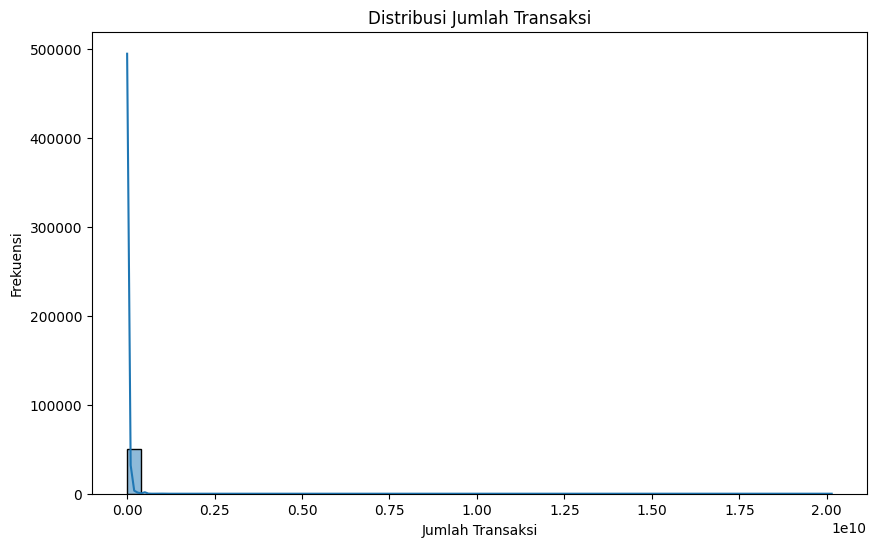

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#a. Analisis Distribusi Jumlah Transaksi
# Plot distribusi jumlah transaksi
plt.figure(figsize=(10, 6))
sns.histplot(dt_digital_payment_transaction['transaction_amount'], kde=True, bins=50)
plt.title('Distribusi Jumlah Transaksi')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Frekuensi')
plt.show()


<ipython-input-67-da09b1f59abf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='transaction_count', y='buyer_id', data=top_pairs, palette='viridis')


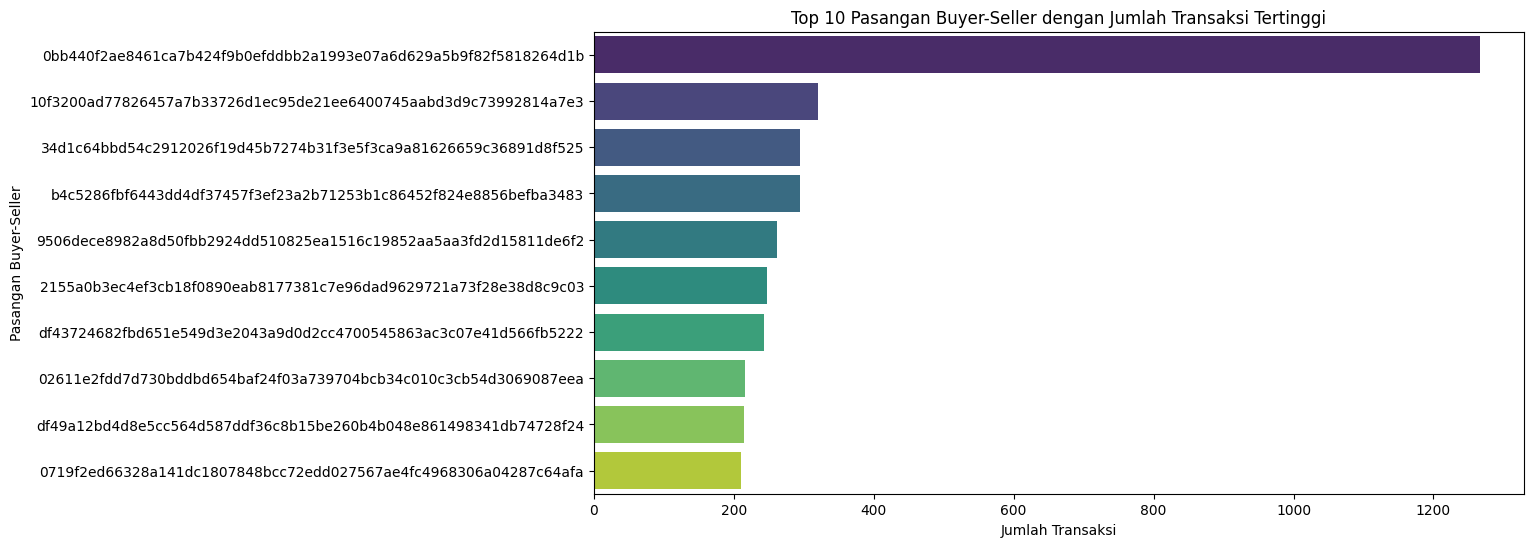

In [ ]:
#b. Frekuensi Pasangan Buyer-Seller
# Hitung jumlah transaksi antara buyer_id dan seller_id
transaction_counts = dt_digital_payment_transaction.groupby(['buyer_id', 'seller_id'])['dpt_id'].count().reset_index()
transaction_counts.rename(columns={'dpt_id': 'transaction_count'}, inplace=True)

# Plot pasangan buyer-seller dengan jumlah transaksi tertinggi
top_pairs = transaction_counts.sort_values(by='transaction_count', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='transaction_count', y='buyer_id', data=top_pairs, palette='viridis')
plt.title('Top 10 Pasangan Buyer-Seller dengan Jumlah Transaksi Tertinggi')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Pasangan Buyer-Seller')
plt.show()


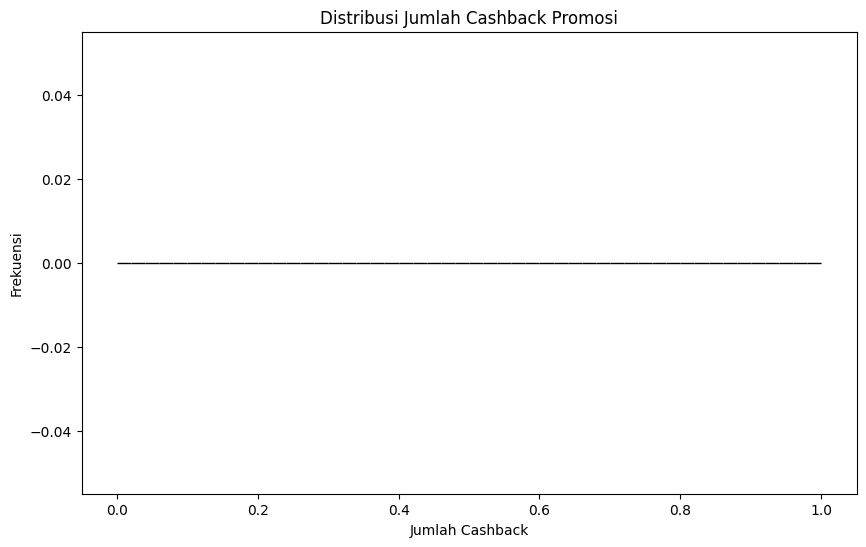

In [ ]:
#c. Penggunaan Promosi
# Gabungkan data transaksi dengan data promosi
transaction_promos = dt_digital_payment_transaction.merge(dt_promotion, how='left', on='dpt_promotion_id')

# Plot distribusi jumlah cashback promosi
plt.figure(figsize=(10, 6))
sns.histplot(transaction_promos['transaction_promo_cashback_amount'], kde=True, bins=50)
plt.title('Distribusi Jumlah Cashback Promosi')
plt.xlabel('Jumlah Cashback')
plt.ylabel('Frekuensi')
plt.show()

# 2.	Visualization:



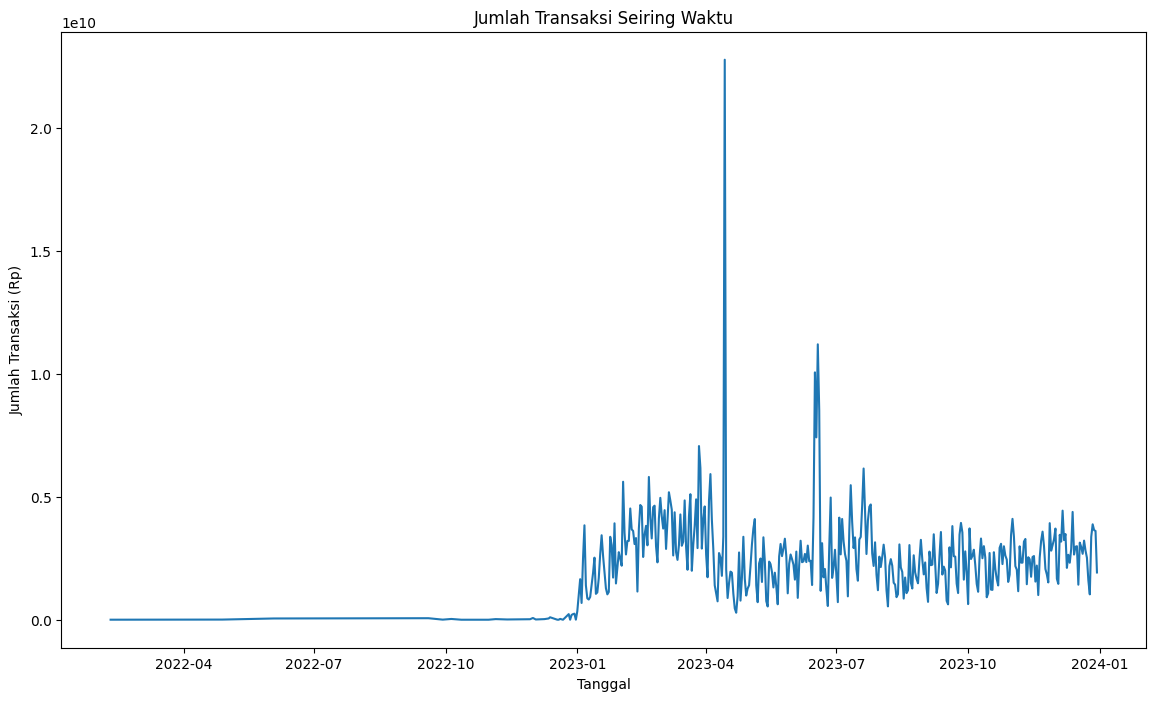

In [ ]:
#VISUALISASI
#a. Plot Jumlah Transaksi Seiring Waktu
# Mengkonversi waktu transaksi menjadi format datetime
dt_digital_payment_transaction['transaction_created_datetime'] = pd.to_datetime(dt_digital_payment_transaction['transaction_created_datetime'], unit='s')

# Plot transaksi jumlah transaksi berdasarkan waktu
plt.figure(figsize=(14, 8))
dt_digital_payment_transaction.groupby(dt_digital_payment_transaction['transaction_created_datetime'].dt.date)['transaction_amount'].sum().plot()
plt.title('Jumlah Transaksi Seiring Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Transaksi (Rp)')
plt.show()


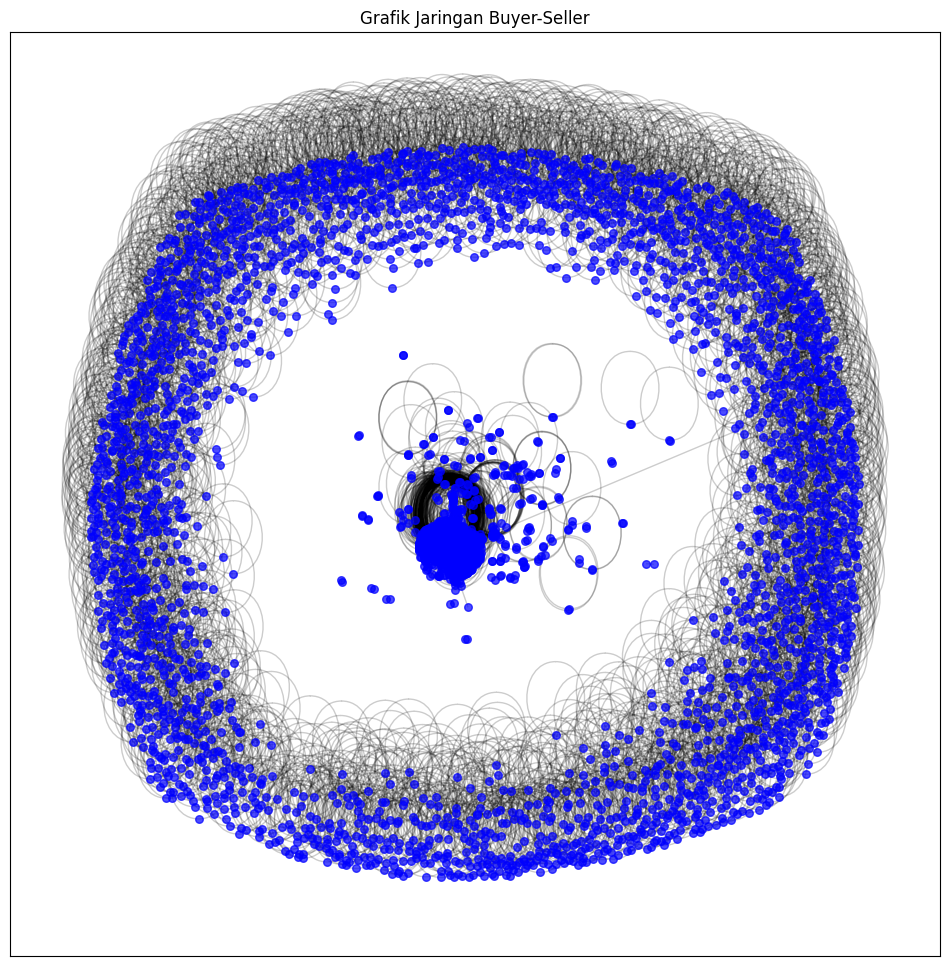

In [ ]:
#b. Grafik Jaringan Buyer-Seller
import networkx as nx

# Membuat grafik hubungan buyer-seller
G = nx.Graph()

# Menambahkan node dan edge berdasarkan transaksi antara buyer dan seller
for _, row in dt_digital_payment_transaction.iterrows():
    G.add_edge(row['buyer_id'], row['seller_id'], weight=row['transaction_amount'])

# Visualisasi jaringan dengan node yang lebih besar untuk hubungan yang lebih kuat
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw_networkx_nodes(G, pos, node_size=30, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.2)
plt.title('Grafik Jaringan Buyer-Seller')
plt.show()


<ipython-input-73-74c93ef2b89f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dpt_promotion_id', data=dt_digital_payment_transaction, palette='Set2')


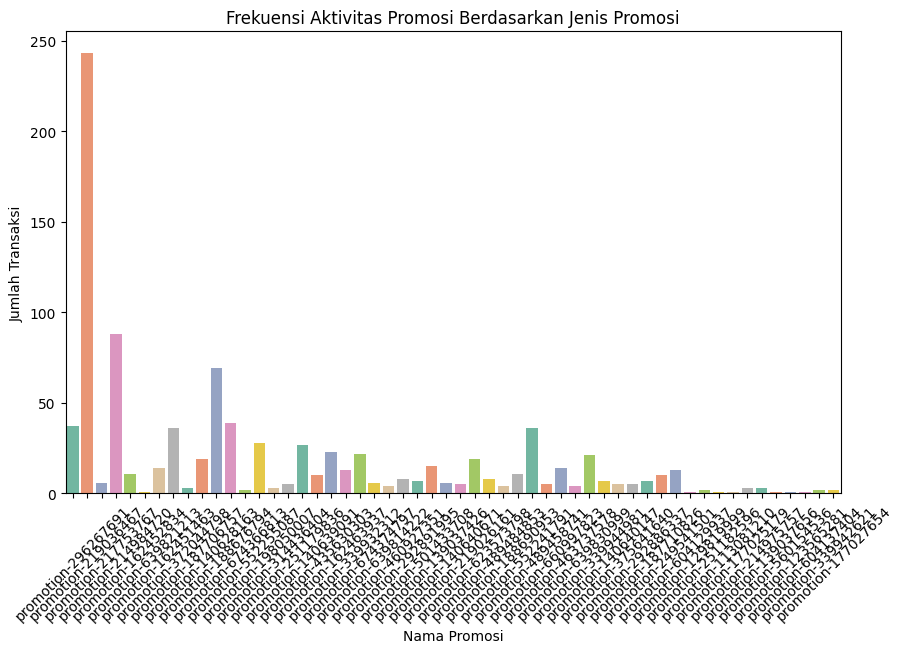

In [ ]:
#c. Visualisasi Aktivitas Promosi
# Visualisasi distribusi frekuensi promosi berdasarkan jenis promosi
plt.figure(figsize=(10, 6))
sns.countplot(x='dpt_promotion_id', data=dt_digital_payment_transaction, palette='Set2')
plt.title('Frekuensi Aktivitas Promosi Berdasarkan Jenis Promosi')
plt.xlabel('Nama Promosi')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.show()


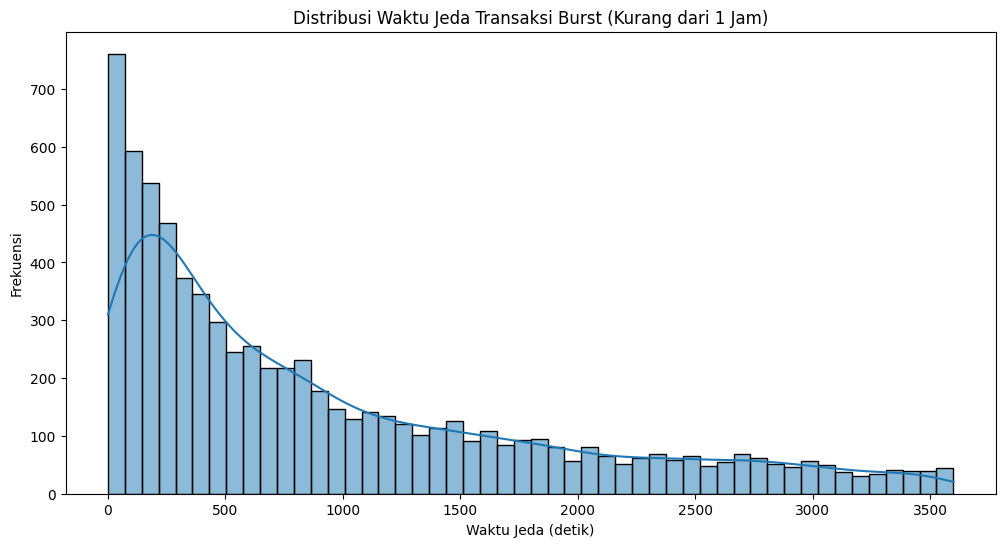

In [ ]:
#3. Investigasi Pola Transaksi Ulangan atau Nilai Transaksi yang Abnormal
#a. Mencari Pola Transaksi Ulangan
# Menambahkan kolom untuk menghitung selisih waktu antara transaksi berurutan
dt_digital_payment_transaction['time_diff'] = dt_digital_payment_transaction.groupby(['buyer_id', 'seller_id'])['transaction_created_datetime'].diff()

# Filter transaksi dengan selisih waktu yang sangat kecil (burst)
burst_transactions = dt_digital_payment_transaction[dt_digital_payment_transaction['time_diff'] < pd.Timedelta('1 hour')]

# Plot transaksi dengan selisih waktu cepat
plt.figure(figsize=(12, 6))
sns.histplot(burst_transactions['time_diff'].dt.total_seconds(), kde=True, bins=50)
plt.title('Distribusi Waktu Jeda Transaksi Burst (Kurang dari 1 Jam)')
plt.xlabel('Waktu Jeda (detik)')
plt.ylabel('Frekuensi')
plt.show()


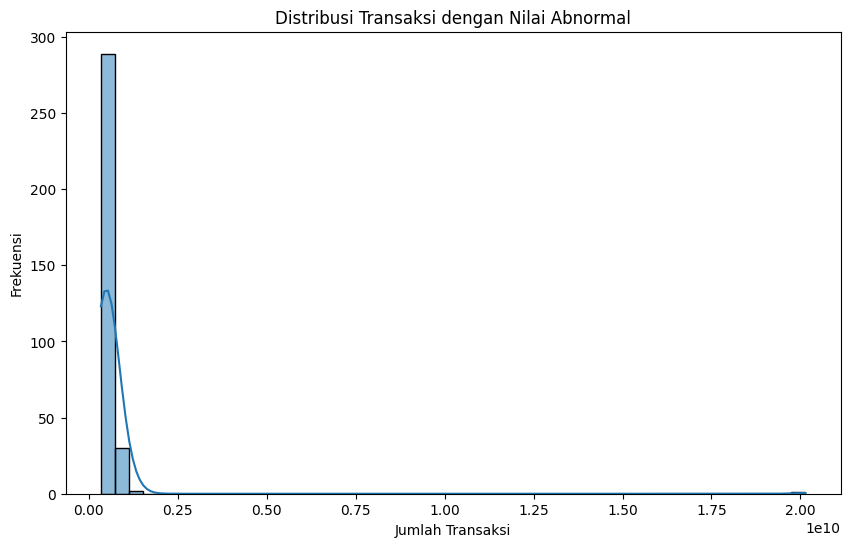

In [ ]:
#b. Transaksi dengan Nilai Abnormal
# Mendefinisikan batas atas untuk transaksi yang abnormal (misalnya lebih dari 3 kali standar deviasi)
transaction_threshold = dt_digital_payment_transaction['transaction_amount'].mean() + 3 * dt_digital_payment_transaction['transaction_amount'].std()

# Menyaring transaksi yang lebih besar dari threshold
abnormal_transactions = dt_digital_payment_transaction[dt_digital_payment_transaction['transaction_amount'] > transaction_threshold]

# Plot transaksi abnormal
plt.figure(figsize=(10, 6))
sns.histplot(abnormal_transactions['transaction_amount'], kde=True, bins=50)
plt.title('Distribusi Transaksi dengan Nilai Abnormal')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Frekuensi')
plt.show()


# [EXTRA] PROSES SQL BERAT

In [ ]:
df_company = pd.read_csv('/content/drive/MyDrive/ColabDatasets/comp-v2.csv')
df_promotion = pd.read_csv('/content/drive/MyDrive/ColabDatasets/promotion-v2.csv')
df_request = pd.read_csv('/content/drive/MyDrive/ColabDatasets/request-v2.csv')
df_transaction = pd.read_csv('/content/drive/MyDrive/ColabDatasets/transaction-v2.csv')

In [ ]:
# Buat database SQLite di memori
import sqlite3
conn = sqlite3.connect(':memory:')

# Masukkan data ke tabel SQLite
df_company.to_sql('comp_v2', conn, if_exists='replace', index=False)
df_promotion.to_sql('promotion_v2', conn, if_exists='replace', index=False)
df_transaction.to_sql('transaction_v2', conn, if_exists='replace', index=False)
df_request.to_sql('request_v2', conn, if_exists='replace', index=False)

50000

In [ ]:
query_transaction_anomalies = """
WITH FraudOrBlacklistedUsers AS (
    -- Menyaring pengguna yang terflag fraud atau blacklist
    SELECT
        company_id,
        user_fraud_flag,
        blacklist_account_flag
    FROM
        comp_v2
    WHERE
        user_fraud_flag = 1 OR blacklist_account_flag = 1
)
-- Menyaring dan menghitung transaksi antara buyer dan seller yang terflag fraud atau blacklist
SELECT
    c.company_id,  -- ID perusahaan yang terdeteksi fraud atau blacklist
    c.user_fraud_flag,  -- Flag fraud untuk perusahaan
    c.blacklist_account_flag,  -- Flag blacklist untuk perusahaan
    t.buyer_id,  -- ID pembeli
    t.seller_id,  -- ID penjual
    COUNT(t.dpt_id) AS transaction_count,  -- Jumlah transaksi antara buyer dan seller ini
    t.transaction_amount,
    SUM(t.transaction_amount) AS total_transaction_amount,  -- Total transaksi antara buyer dan seller ini
    t.suspicious,  -- Kolom suspicious yang sudah ada
    t.relationship_score,  -- Skor hubungan antara buyer dan seller
    t.transaction_created_datetime  -- Waktu ketika transaksi dibuat
FROM
    transaction_v2 t
JOIN
    FraudOrBlacklistedUsers c ON (t.buyer_id = c.company_id OR t.seller_id = c.company_id)  -- Hanya transaksi dengan pengguna fraud atau blacklist
GROUP BY
    t.buyer_id, t.seller_id, c.company_id, t.transaction_created_datetime  -- Mengelompokkan berdasarkan interaksi antara buyer dan seller serta waktu transaksi
ORDER BY
    transaction_count DESC, total_transaction_amount DESC;  -- Urutkan berdasarkan jumlah transaksi dan total nilai transaksi
"""
# Eksekusi query SQL dan ambil hasilnya ke dalam DataFrame
df_anomalies = pd.read_sql_query(query_transaction_anomalies, conn)

# Tampilkan hasilnya
df_anomalies

,company_id,user_fraud_flag,blacklist_account_flag,buyer_id,seller_id,transaction_count,transaction_amount,total_transaction_amount,suspicious,relationship_score,transaction_created_datetime
0,e86bd6df55286c8cb120958807c7307bc3d2b23b2c5827...,1.0,0.0,e86bd6df55286c8cb120958807c7307bc3d2b23b2c5827...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,184,158862.1,29230626.4,0,0.14534,2023-07-29 11:51:49.383961
1,e86bd6df55286c8cb120958807c7307bc3d2b23b2c5827...,1.0,0.0,e86bd6df55286c8cb120958807c7307bc3d2b23b2c5827...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,184,49931.0,9187304.0,0,0.14534,2023-08-29 07:17:25.488592
2,e86bd6df55286c8cb120958807c7307bc3d2b23b2c5827...,1.0,0.0,e86bd6df55286c8cb120958807c7307bc3d2b23b2c5827...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,184,49931.0,9187304.0,0,0.14534,2023-08-29 12:50:57.158537
3,e86bd6df55286c8cb120958807c7307bc3d2b23b2c5827...,1.0,0.0,e86bd6df55286c8cb120958807c7307bc3d2b23b2c5827...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,184,49931.0,9187304.0,0,0.14534,2023-08-29 13:01:34.083383
4,e86bd6df55286c8cb120958807c7307bc3d2b23b2c5827...,1.0,0.0,e86bd6df55286c8cb120958807c7307bc3d2b23b2c5827...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,184,49931.0,9187304.0,0,0.14534,2023-08-29 13:07:48.774297
...,...,...,...,...,...,...,...,...,...,...,...
7723,58547af6c50d50a6a1fc8a2a5d9d8ea1dbd04f1f9b91dc...,1.0,0.0,58547af6c50d50a6a1fc8a2a5d9d8ea1dbd04f1f9b91dc...,58547af6c50d50a6a1fc8a2a5d9d8ea1dbd04f1f9b91dc...,1,100000.0,100000.0,0,0.00079,2023-06-05 17:04:47.386637
7724,4b5000b50ede2bd36302eb3476d32b1127e80a3bd1e9b1...,1.0,0.0,4b5000b50ede2bd36302eb3476d32b1127e80a3bd1e9b1...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,1,52988.0,52988.0,0,0.00079,2023-06-14 15:22:22.259941
7725,f8809debfec4634dd90d343b2c7fa1748b2e492ee5d981...,1.0,0.0,f8809debfec4634dd90d343b2c7fa1748b2e492ee5d981...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,1,35053.6,35053.6,0,0.00079,2023-05-25 01:41:22.519512
7726,1c9ea6457229ef9f81f7db0b8cad763a95f4308d8759e3...,1.0,0.0,1c9ea6457229ef9f81f7db0b8cad763a95f4308d8759e3...,1c9ea6457229ef9f81f7db0b8cad763a95f4308d8759e3...,1,22500.0,22500.0,0,0.00079,2022-12-22 12:34:11.607553


In [ ]:
df_anomalies.to_csv('task4_no1_Flagged User Connections-v4.csv', index=False)

In [ ]:
# Download file
from google.colab import files
files.download('task4_no1_Flagged User Connections-v4.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Task 6: Social Network and Cohort Analysis

# 1.	Social Network Analysis

# ●	Identify clusters of buyers and sellers that frequently interact, especially those involved in flagged or blacklisted transactions.

<ipython-input-30-f940c643b638>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspicious_data['cluster'] = suspicious_data['buyer_id'].map(node_clusters)


                                                buyer_id  \
30963  001046b5061e28476b83fe2335b04d3210bed72a2fee17...   
9971   001046b5061e28476b83fe2335b04d3210bed72a2fee17...   
21264  00119737eef11ff1d30c2061dd1e19c06d963d5a125c92...   
14723  0012614e5a1366f102a3497b67f8ec9a8009c802aa6959...   
28195  0013cdaff46e67574660e0ddd214e5032e3ff5d94744e1...   
...                                                  ...   
9049   fff5f7cf3deff1c2acad4533c4b845f8f2c0c05168f668...   
25856  fff77b856ac2478f8911b9cddf65980ac7fdc4d700e354...   
17692  fff9528eb5496b60fd3e824c66154f2d2f06c27c172a4a...   
24571  fff9528eb5496b60fd3e824c66154f2d2f06c27c172a4a...   
38829  fffd31df4d9dbfd4c0f2b9a6c44e794d9560f3cd630819...   

                                               seller_id  cluster  
30963  5d2233f5a1a6435891142442fac09a77809d0c16496f07...        0  
9971   5d2233f5a1a6435891142442fac09a77809d0c16496f07...        0  
21264  5d2233f5a1a6435891142442fac09a77809d0c16496f07...        0  
14723  

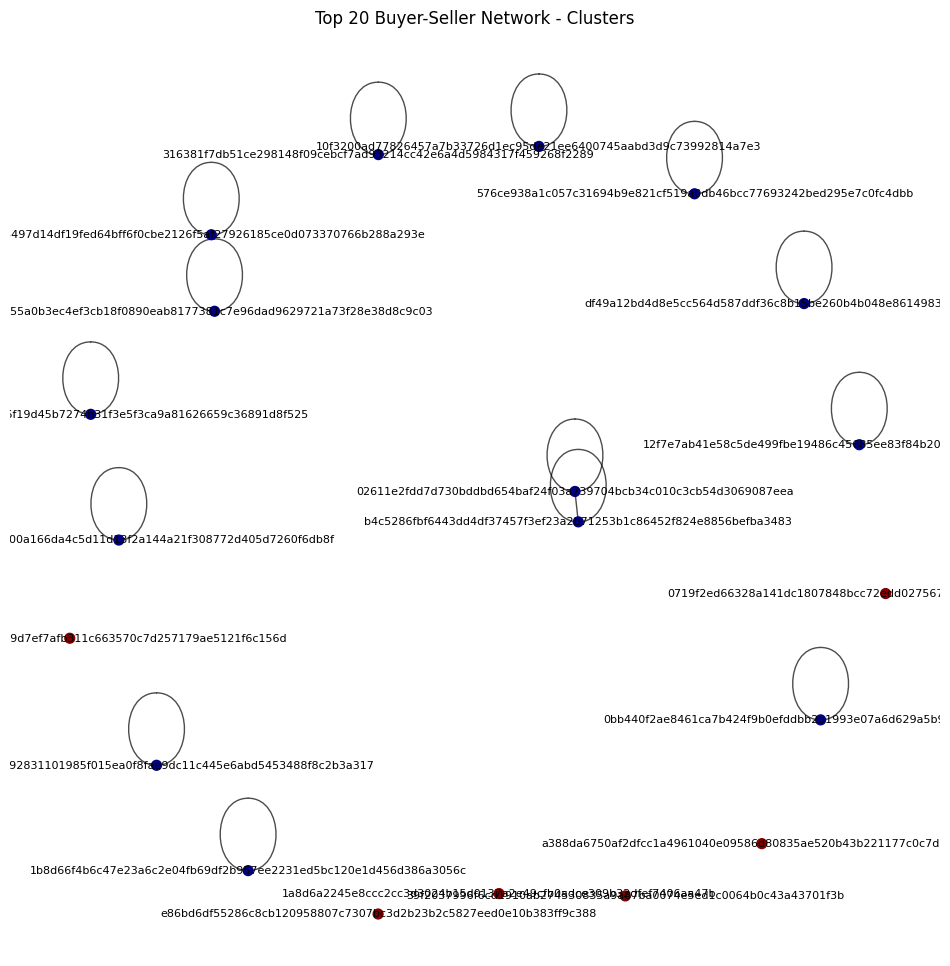

001046b5061e28476b83fe2335b04d3210bed72a2fee173fffa7f497ec7bbd25    0
00119737eef11ff1d30c2061dd1e19c06d963d5a125c92ea6328a45c2d4c5f45    0
0012614e5a1366f102a3497b67f8ec9a8009c802aa69590db00a0b1fd1a13153    0
0013cdaff46e67574660e0ddd214e5032e3ff5d94744e167feb755940299b693    0
001aa5e447130ae69fb4699960094fe6d8f7aa1178f23d8f153200db39e24a86    0
                                                                   ..
fff5a90a971c4b76a32653314e4b344d3d492f197837db9b8feb674b7c433e70    0
fff5f7cf3deff1c2acad4533c4b845f8f2c0c05168f668dabb78a5b0db483d4f    0
fff77b856ac2478f8911b9cddf65980ac7fdc4d700e354396512f01886e78e6e    0
fff9528eb5496b60fd3e824c66154f2d2f06c27c172a4a42441ec277fbd6871e    0
fffd31df4d9dbfd4c0f2b9a6c44e794d9560f3cd630819b97ac056cdd69b6059    0
Length: 5868, dtype: int64


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

# Membaca data transaksi
df = dt_digital_payment_transaction

# Filter transaksi yang mencurigakan atau blacklist
suspicious_data = df[(df['suspicious'] == True) |
                      (df['buyer_id'].isin(df[df['buyer_burst_flag'] == True]['buyer_id'])) |
                      (df['seller_id'].isin(df[df['seller_burst_flag'] == True]['seller_id']))]

# Membuat Graph
G = nx.Graph()

# Menambahkan node dan edge (hubungan buyer-seller)
for idx, row in suspicious_data.iterrows():
    G.add_edge(row['buyer_id'], row['seller_id'])

# Ambil semua node yang terlibat dalam transaksi
nodes = list(G.nodes())

# Buat fitur untuk DBSCAN: menghitung interaksi antara node
interaction_matrix = np.zeros((len(nodes), len(nodes)))

# Menyusun matriks interaksi
node_indices = {node: idx for idx, node in enumerate(nodes)}

# Mengisi matriks interaksi
for edge in G.edges():
    i = node_indices[edge[0]]
    j = node_indices[edge[1]]
    interaction_matrix[i, j] = 1
    interaction_matrix[j, i] = 1

# Menggunakan DBSCAN untuk clustering
db = DBSCAN(eps=0.5, min_samples=5, metric='euclidean').fit(interaction_matrix)

# Menambahkan informasi cluster ke node
node_clusters = pd.Series(db.labels_, index=nodes)

# Menghilangkan node dengan label -1 (noise) dan menyaring hasil
node_clusters_filtered = node_clusters[node_clusters != -1]

# Menambahkan label cluster ke DataFrame transaksi
suspicious_data['cluster'] = suspicious_data['buyer_id'].map(node_clusters)

# Menampilkan hasil cluster yang berisi buyer_id, seller_id, dan cluster label
cluster_result = suspicious_data[['buyer_id', 'seller_id', 'cluster']]
print(cluster_result)


#### VISUALISASI

# Menyaring node dengan ranking tertinggi (misalnya berdasarkan relationship_score)
top_n = 20  # Ambil top 20 node dengan relationship_score tertinggi
top_nodes = suspicious_data.groupby('buyer_id')['relationship_score'].sum().nlargest(top_n).index

# Membuat subgraph hanya untuk top nodes
G_top = G.subgraph(top_nodes)

# Visualisasi hasil clustering untuk top nodes
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_top)
node_colors = [node_clusters.get(node, -1) for node in G_top.nodes()]

# Menggambar nodes dengan warna berdasarkan cluster
nx.draw_networkx_nodes(G_top, pos, node_size=50, node_color=node_colors, cmap=plt.cm.jet)

# Menggambar edges antara nodes
nx.draw_networkx_edges(G_top, pos, alpha=0.7)

# Menambahkan label untuk setiap node (buyer_id atau seller_id)
node_labels = {node: node for node in G_top.nodes()}
nx.draw_networkx_labels(G_top, pos, labels=node_labels, font_size=8, font_color="black")

# Menambahkan judul ke visualisasi
plt.title(f"Top {top_n} Buyer-Seller Network - Clusters")
plt.axis('off')  # Matikan axis
plt.show()

# Menampilkan hasil cluster yang telah disaring
print(node_clusters_filtered)


# ●	Find central users (e.g., buyers or sellers) who are highly connected and may be involved in fraudulent networks.

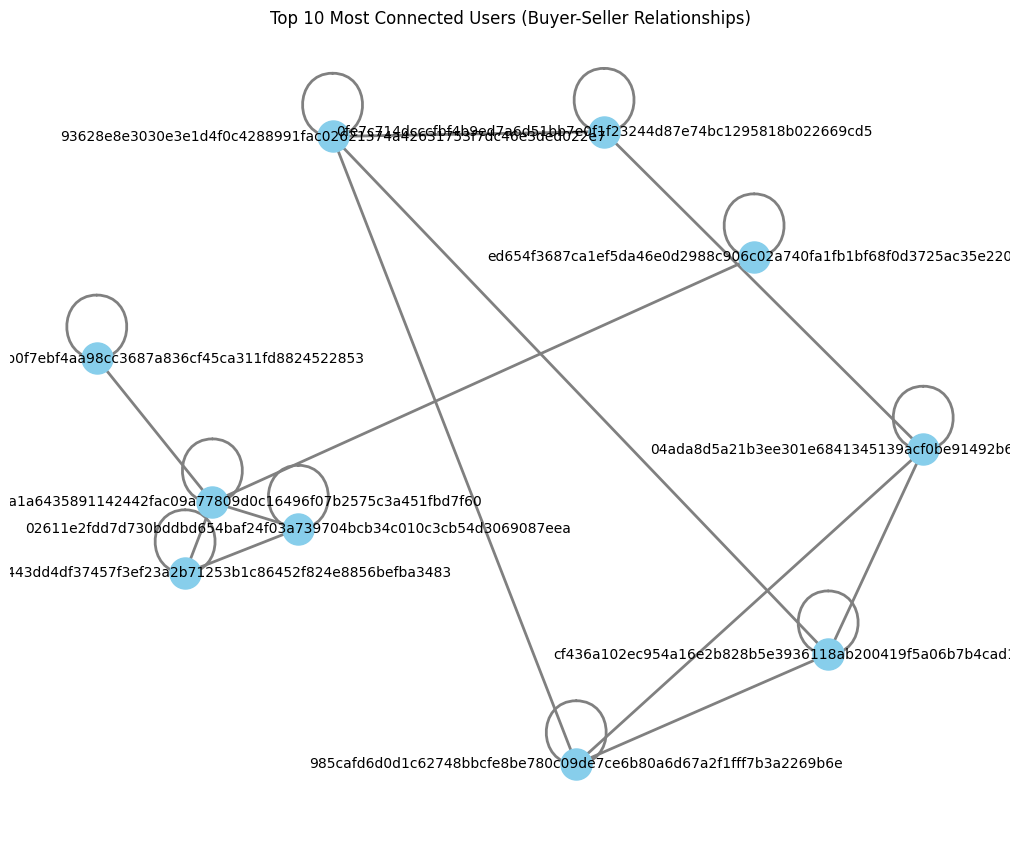

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Membaca dataset transaksi (dt_digital_payment_transaction)
df = dt_digital_payment_transaction  # Jika menggunakan variabel dt_digital_payment_transaction yang sudah ada

# Membuat graf hubungan antara buyer dan seller
G = nx.Graph()

# Menambahkan edges untuk setiap transaksi antara buyer dan seller
for _, row in df.iterrows():
    buyer = row['buyer_id']
    seller = row['seller_id']

    # Menambahkan edge antara buyer dan seller, dengan bobot berdasarkan transaction_amount atau relationship_score
    G.add_edge(buyer, seller, weight=row['relationship_score'])

# Mencari central users dengan Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Mengurutkan dan mengambil 10 pengguna dengan degree centrality tertinggi
top_users = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_users_ids = [user[0] for user in top_users]  # Hanya mengambil ID pengguna dengan centrality tertinggi

# Membuat subgraf yang hanya mencakup pengguna top 10
subgraph = G.subgraph(top_users_ids)

# Visualisasi subgraf (hanya top 10 pengguna)
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(subgraph)  # Layout untuk menggambar jaringan
nx.draw(subgraph, pos, with_labels=True, node_size=500, font_size=10, node_color="skyblue", edge_color="gray", width=2)
plt.title("Top 10 Most Connected Users (Buyer-Seller Relationships)")
plt.show()


# ●	Visualizing User Networks

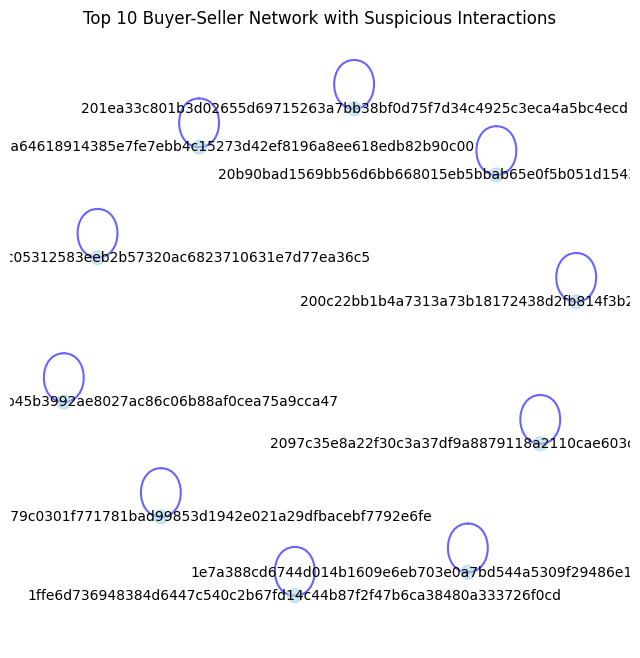

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load data transaksi (pastikan DataFrame 'dt_digital_payment_transaction' sudah ada)
# dt_digital_payment_transaction = pd.read_csv('path_to_transaction_data.csv')

# -----------------------
# Membuat Graph Network Buyer-Seller
# -----------------------

G = nx.Graph()

# Menambahkan edges berdasarkan data transaksi
for index, row in dt_digital_payment_transaction.iterrows():
    buyer = row['buyer_id']
    seller = row['seller_id']
    suspicious = row['suspicious']

    # Menambahkan edge antara buyer dan seller
    G.add_edge(buyer, seller, suspicious=suspicious)

# -----------------------
# Menyaring Node dengan Transaksi Terbanyak atau Paling Sedikit
# -----------------------

# Hitung jumlah transaksi antara setiap pasangan buyer-seller
transaction_counts = pd.Series([f'{u}-{v}' for u, v in G.edges()])
transaction_count = transaction_counts.value_counts()

# Ambil 10 hubungan terbanyak
top_10_edges = transaction_count.head(10).index.tolist()

# Ambil 10 hubungan paling sedikit (jika ada lebih dari 10 edge)
bottom_10_edges = transaction_count.tail(10).index.tolist()

# -----------------------
# Menyaring pasangan buyer-seller dari string ke tuple
# -----------------------

# Mengubah 'buyer-seller' menjadi tuple (buyer, seller)
top_10_edges_tuples = [(edge.split('-')[0], edge.split('-')[1]) for edge in top_10_edges]
bottom_10_edges_tuples = [(edge.split('-')[0], edge.split('-')[1]) for edge in bottom_10_edges]

# -----------------------
# Visualisasi Jaringan Top 10 Terbanyak
# -----------------------

# Filter hanya edge top 10 terbanyak
top_10_graph = G.edge_subgraph(top_10_edges_tuples).copy()

# Visualisasi jaringan top 10 terbanyak
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(top_10_graph)  # Penataan posisi node menggunakan spring layout
edge_colors = ['red' if top_10_graph[u][v]['suspicious'] else 'blue' for u, v in top_10_graph.edges()]
node_sizes = [len(list(top_10_graph.neighbors(node))) * 100 for node in top_10_graph.nodes()]

nx.draw_networkx_nodes(top_10_graph, pos, node_size=node_sizes, node_color='lightblue', alpha=0.6)
nx.draw_networkx_edges(top_10_graph, pos, edge_color=edge_colors, width=1.5, alpha=0.6)
nx.draw_networkx_labels(top_10_graph, pos, font_size=10, font_color='black')

plt.title('Top 10 Buyer-Seller Network with Suspicious Interactions')
plt.axis('off')
plt.show()


# 2.	Cohort Analysis

# ●	Group buyers by their first transaction date and measure their continued activity over time.

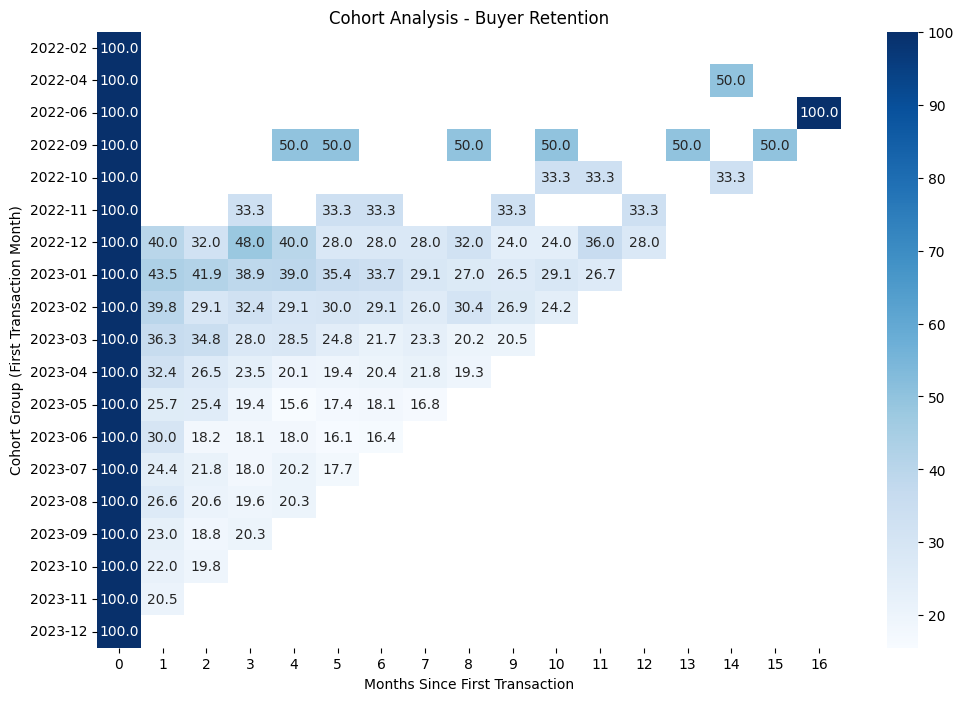

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data
# Gantilah dt_digital_payment_transaction dengan data yang ada di Colab
df_transaction = dt_digital_payment_transaction.copy()

# 2. Convert datetime columns to proper datetime format
df_transaction['transaction_created_datetime'] = pd.to_datetime(df_transaction['transaction_created_datetime'], unit='s')

# 3. Determine the first transaction date for each buyer
df_first_transaction = df_transaction.groupby('buyer_id')['transaction_created_datetime'].min().reset_index()
df_first_transaction.rename(columns={'transaction_created_datetime': 'first_transaction_date'}, inplace=True)

# 4. Merge first transaction date with the original dataset
df_transaction = pd.merge(df_transaction, df_first_transaction, on='buyer_id', how='left')

# 5. Create a cohort group for each buyer based on the first transaction month
df_transaction['cohort_month'] = df_transaction['first_transaction_date'].dt.to_period('M')

# 6. Calculate the difference in months between each transaction and the first transaction
df_transaction['transaction_month_diff'] = ((df_transaction['transaction_created_datetime'].dt.year - df_transaction['first_transaction_date'].dt.year) * 12) + (df_transaction['transaction_created_datetime'].dt.month - df_transaction['first_transaction_date'].dt.month)

# 7. Calculate the number of transactions per cohort group and month difference
cohort_data = df_transaction.groupby(['cohort_month', 'transaction_month_diff'])['buyer_id'].nunique().reset_index()

# 8. Pivot the data to create a cohort retention table
cohort_pivot = cohort_data.pivot_table(index='cohort_month', columns='transaction_month_diff', values='buyer_id', aggfunc='sum')

# 9. Calculate retention rates (the proportion of repeat transactions over time)
cohort_retention = cohort_pivot.divide(cohort_pivot.iloc[:, 0], axis=0) * 100

# 10. Plot the cohort retention table as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_retention, annot=True, fmt='.1f', cmap='Blues', cbar=True)
plt.title('Cohort Analysis - Buyer Retention')
plt.xlabel('Months Since First Transaction')
plt.ylabel('Cohort Group (First Transaction Month)')
plt.show()


# ●	Identify whether certain buyers engage in fraudulent behavior after a period of inactivity or repeatedly interact with the same sellers.

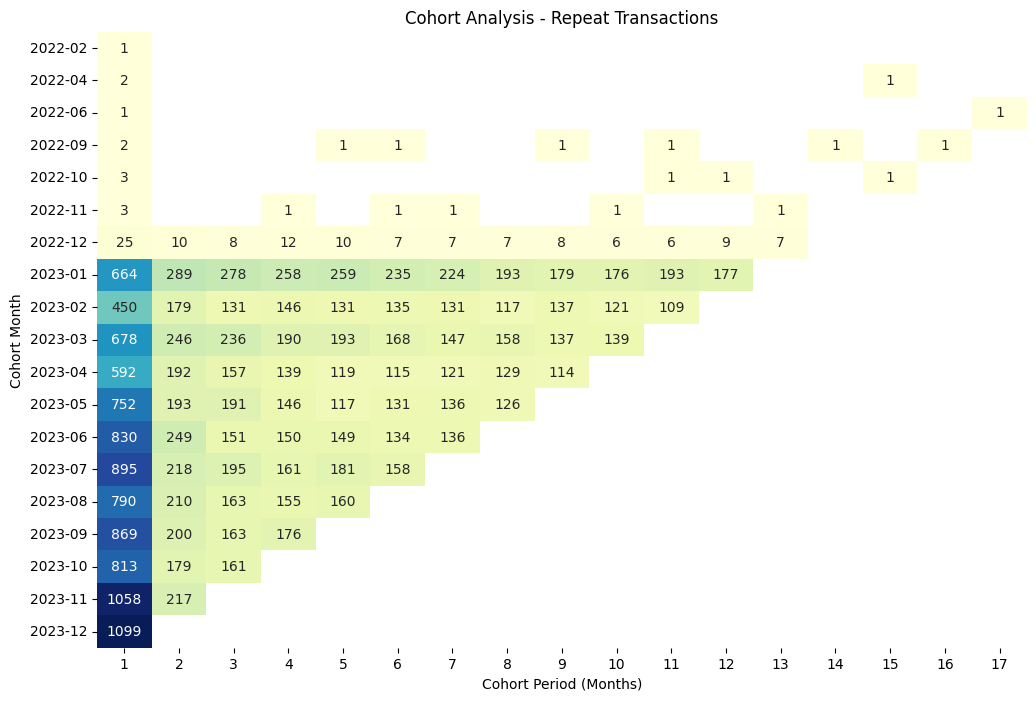

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
dt_transaction = dt_digital_payment_transaction

# Pastikan kolom 'transaction_created_datetime' dalam format datetime
dt_transaction['transaction_created_datetime'] = pd.to_datetime(dt_transaction['transaction_created_datetime'], unit='s')

# Tambahkan kolom 'cohort_month' (bulan pertama transaksi) dan 'transaction_month' (bulan transaksi)
dt_transaction['cohort_month'] = dt_transaction.groupby('buyer_id')['transaction_created_datetime'].transform('min').dt.to_period('M')
dt_transaction['transaction_month'] = dt_transaction['transaction_created_datetime'].dt.to_period('M')

# Menghitung jumlah transaksi per bulan dan cohort
cohort_data = dt_transaction.groupby(['cohort_month', 'transaction_month']).agg(n_customers=('buyer_id', 'nunique')).reset_index()

# Hitung selisih bulan antara 'cohort_month' dan 'transaction_month'
cohort_data['cohort_period'] = (cohort_data['transaction_month'].dt.year - cohort_data['cohort_month'].dt.year) * 12 + (cohort_data['transaction_month'].dt.month - cohort_data['cohort_month'].dt.month) + 1

# Pivot data untuk memudahkan analisis cohort
cohort_pivot = cohort_data.pivot_table(index='cohort_month', columns='cohort_period', values='n_customers')

# Visualisasi cohort analysis
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_pivot, annot=True, fmt=".0f", cmap="YlGnBu", cbar=False)  # Ubah format menjadi ".0f" untuk format angka bulat
plt.title('Cohort Analysis - Repeat Transactions')
plt.xlabel('Cohort Period (Months)')
plt.ylabel('Cohort Month')
plt.show()

# 3.	Insight Generation

# ●	Analyze cohort behavior to detect recurring fraud patterns. For example, are there spikes in fraud after promotional campaigns?

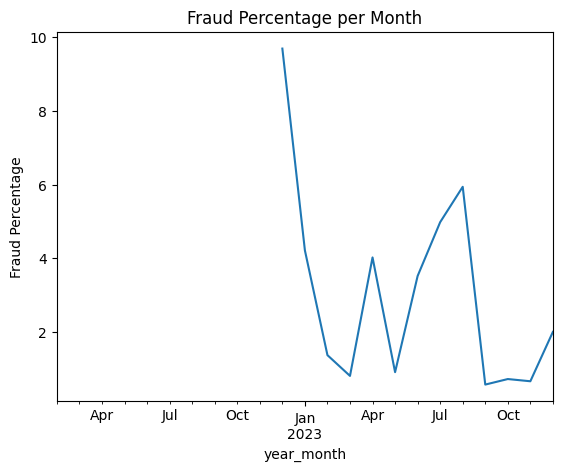

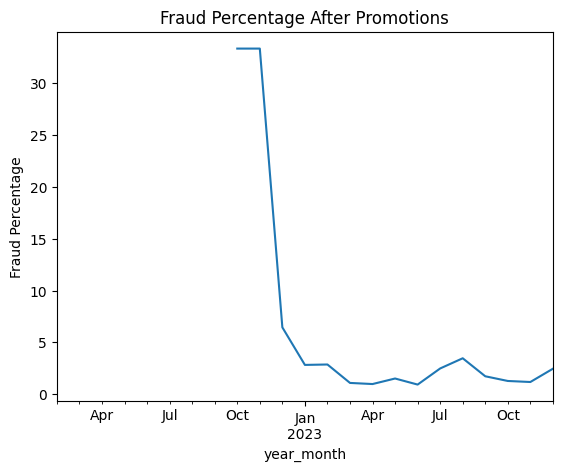

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumsi kamu sudah memuat data dengan nama yang sesuai
# dt_transaction (dataset transaksi), dt_promotion (dataset promosi)

# Mengonversi kolom 'transaction_created_datetime' menjadi datetime
dt_transaction['transaction_created_datetime'] = pd.to_datetime(dt_transaction['transaction_created_datetime'], unit='s')

# Menambahkan kolom 'year_month' untuk analisis berdasarkan bulan
dt_transaction['year_month'] = dt_transaction['transaction_created_datetime'].dt.to_period('M')

# Menyaring transaksi yang mencurigakan
dt_suspicious = dt_transaction[dt_transaction['suspicious'] == True]

# Menghitung persentase transaksi mencurigakan per bulan
suspicious_monthly = dt_suspicious.groupby('year_month').size()
all_monthly = dt_transaction.groupby('year_month').size()
fraud_percentage = (suspicious_monthly / all_monthly) * 100

# Plot persentase kecurangan per bulan
fraud_percentage.plot(kind='line', title='Fraud Percentage per Month')
plt.ylabel('Fraud Percentage')
plt.show()

# Menyaring transaksi yang terkait dengan promosi berdasarkan dpt_promotion_id
dt_promotion_fraud = dt_transaction[dt_transaction['dpt_promotion_id'].notna()]

# Menghitung persentase kecurangan yang terkait dengan promosi per bulan
promotion_fraud_monthly = dt_promotion_fraud.groupby('year_month').size()
promotion_fraud_percentage = (promotion_fraud_monthly / all_monthly) * 100

# Plot persentase kecurangan setelah promosi
promotion_fraud_percentage.plot(kind='line', title='Fraud Percentage After Promotions')
plt.ylabel('Fraud Percentage')
plt.show()
